In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import time
import csv 
import re

In [12]:
df1=pd.read_csv('indeedfullchuasua.csv',parse_dates=['Date'])
z = []

In [13]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import matplotlib
from pylab import rcParams

warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

In [14]:
df1 = df1.rename(columns={'Unnamed: 0.1': 'Jobnum'})
df1.head(5)

,Unnamed: 0,Jobnum,Unnamed: 0.1.1,Jobtitle,Company,City,State,FormattedLocation,Date,Snippet,URL,Latitude,Longitude,Salary,Rating,full_jd,worktype
0,0,0,0,Night Fill Team Member,Woolworths Supermarkets,Para Hills,SA,Para Hills SA,2020-09-28 11:14:33+00:00,"Whether you’re starting out, already on the wa...",https://au.indeed.com/viewjob?jk=7d109f7660adf...,-34.79980,138.6625,None,3.8,Night Fill Team Member\n\nStarting in the afte...,"<div class=""jobsearch-JobMetadataHeader-item"">..."
1,1,1,1,Retail Assistant (20 hrs pw),ALDI,Dandenong,VIC,Dandenong VIC,2020-09-28 03:50:31+00:00,A Retail Assistant at ALDI needs to be able to...,https://au.indeed.com/viewjob?jk=9d1505be67b54...,-37.98333,145.2000,None,3.8,"At ALDI, our people are the key to our success...","<div class=""jobsearch-JobMetadataHeader-item"">..."
2,2,2,2,Fresh Team Member,Woolworths Supermarkets,Springfield,QLD,Springfield QLD,2020-09-28 11:14:32+00:00,"Whether you’re starting out, already on the wa...",https://au.indeed.com/viewjob?jk=5f6559ba4dff2...,-27.66390,152.8970,None,3.8,Fresh Team Member\n\nFrom meats and cheeses to...,"<div class=""jobsearch-JobMetadataHeader-item"">..."
3,3,3,3,"Fruit Picking, Thinning, Pruning, Packing",Everlasting Agriculture Management,NaN,WA,Western Australia,2019-08-30 04:33:55+00:00,Work will be paid accordingly to casual minimu...,https://au.indeed.com/viewjob?jk=a6fe75fb5c3d5...,NaN,NaN,None,3.8,We are always looking for people to join our t...,NaN
4,4,4,4,Drive-Thru Attendant,BWS,Gawler,SA,Gawler SA,2020-09-29 05:14:29+00:00,Whether it's in the way we connect with custom...,https://au.indeed.com/viewjob?jk=896b1d74f6720...,-34.60000,138.7333,None,3.8,"At BWS, we are passionate about Beer, Wine and...","<div class=""jobsearch-JobMetadataHeader-item"">..."


In [29]:
df1.index.sort_values()


DatetimeIndex(['2019-05-29 07:02:08+00:00', '2019-05-29 07:02:08+00:00',
               '2019-05-29 07:02:08+00:00', '2019-05-29 07:02:08+00:00',
               '2019-05-29 07:02:08+00:00', '2019-05-29 07:02:08+00:00',
               '2019-05-29 07:02:08+00:00', '2019-05-29 07:02:08+00:00',
               '2019-05-29 07:02:08+00:00', '2019-05-29 07:02:08+00:00',
               ...
               '2020-09-29 20:54:06+00:00', '2020-09-29 20:54:06+00:00',
               '2020-09-29 20:54:06+00:00', '2020-09-29 20:54:06+00:00',
               '2020-09-29 20:54:06+00:00', '2020-09-29 20:54:06+00:00',
               '2020-09-29 20:54:06+00:00', '2020-09-29 20:54:06+00:00',
               '2020-09-29 20:54:06+00:00', '2020-09-29 20:54:06+00:00'],
              dtype='datetime64[ns, UTC]', name='Date', length=5200, freq=None)

In [15]:
df1.set_index('Date', inplace=True)

In [16]:
df1=df1.drop(['Unnamed: 0'], axis=1)

In [17]:
matplotlib.rcParams['axes.labelsize'] = 23
matplotlib.rcParams['xtick.labelsize'] = 17
matplotlib.rcParams['ytick.labelsize'] = 17
matplotlib.rcParams['text.color'] = 'k'


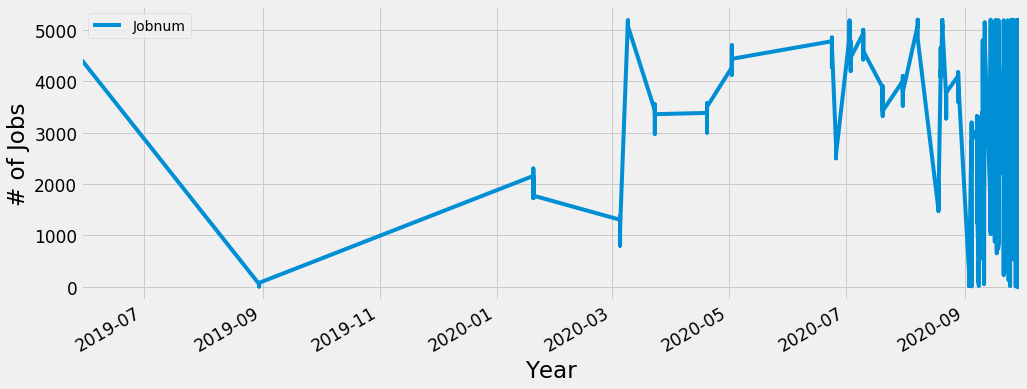

In [18]:
ax=df1.plot(y='Jobnum',figsize=(15, 6))

ax.set_xlabel('Year')
ax.set_ylabel('# of Jobs')

plt.legend()
plt.show()

In [19]:
df_job=df1['Jobnum']

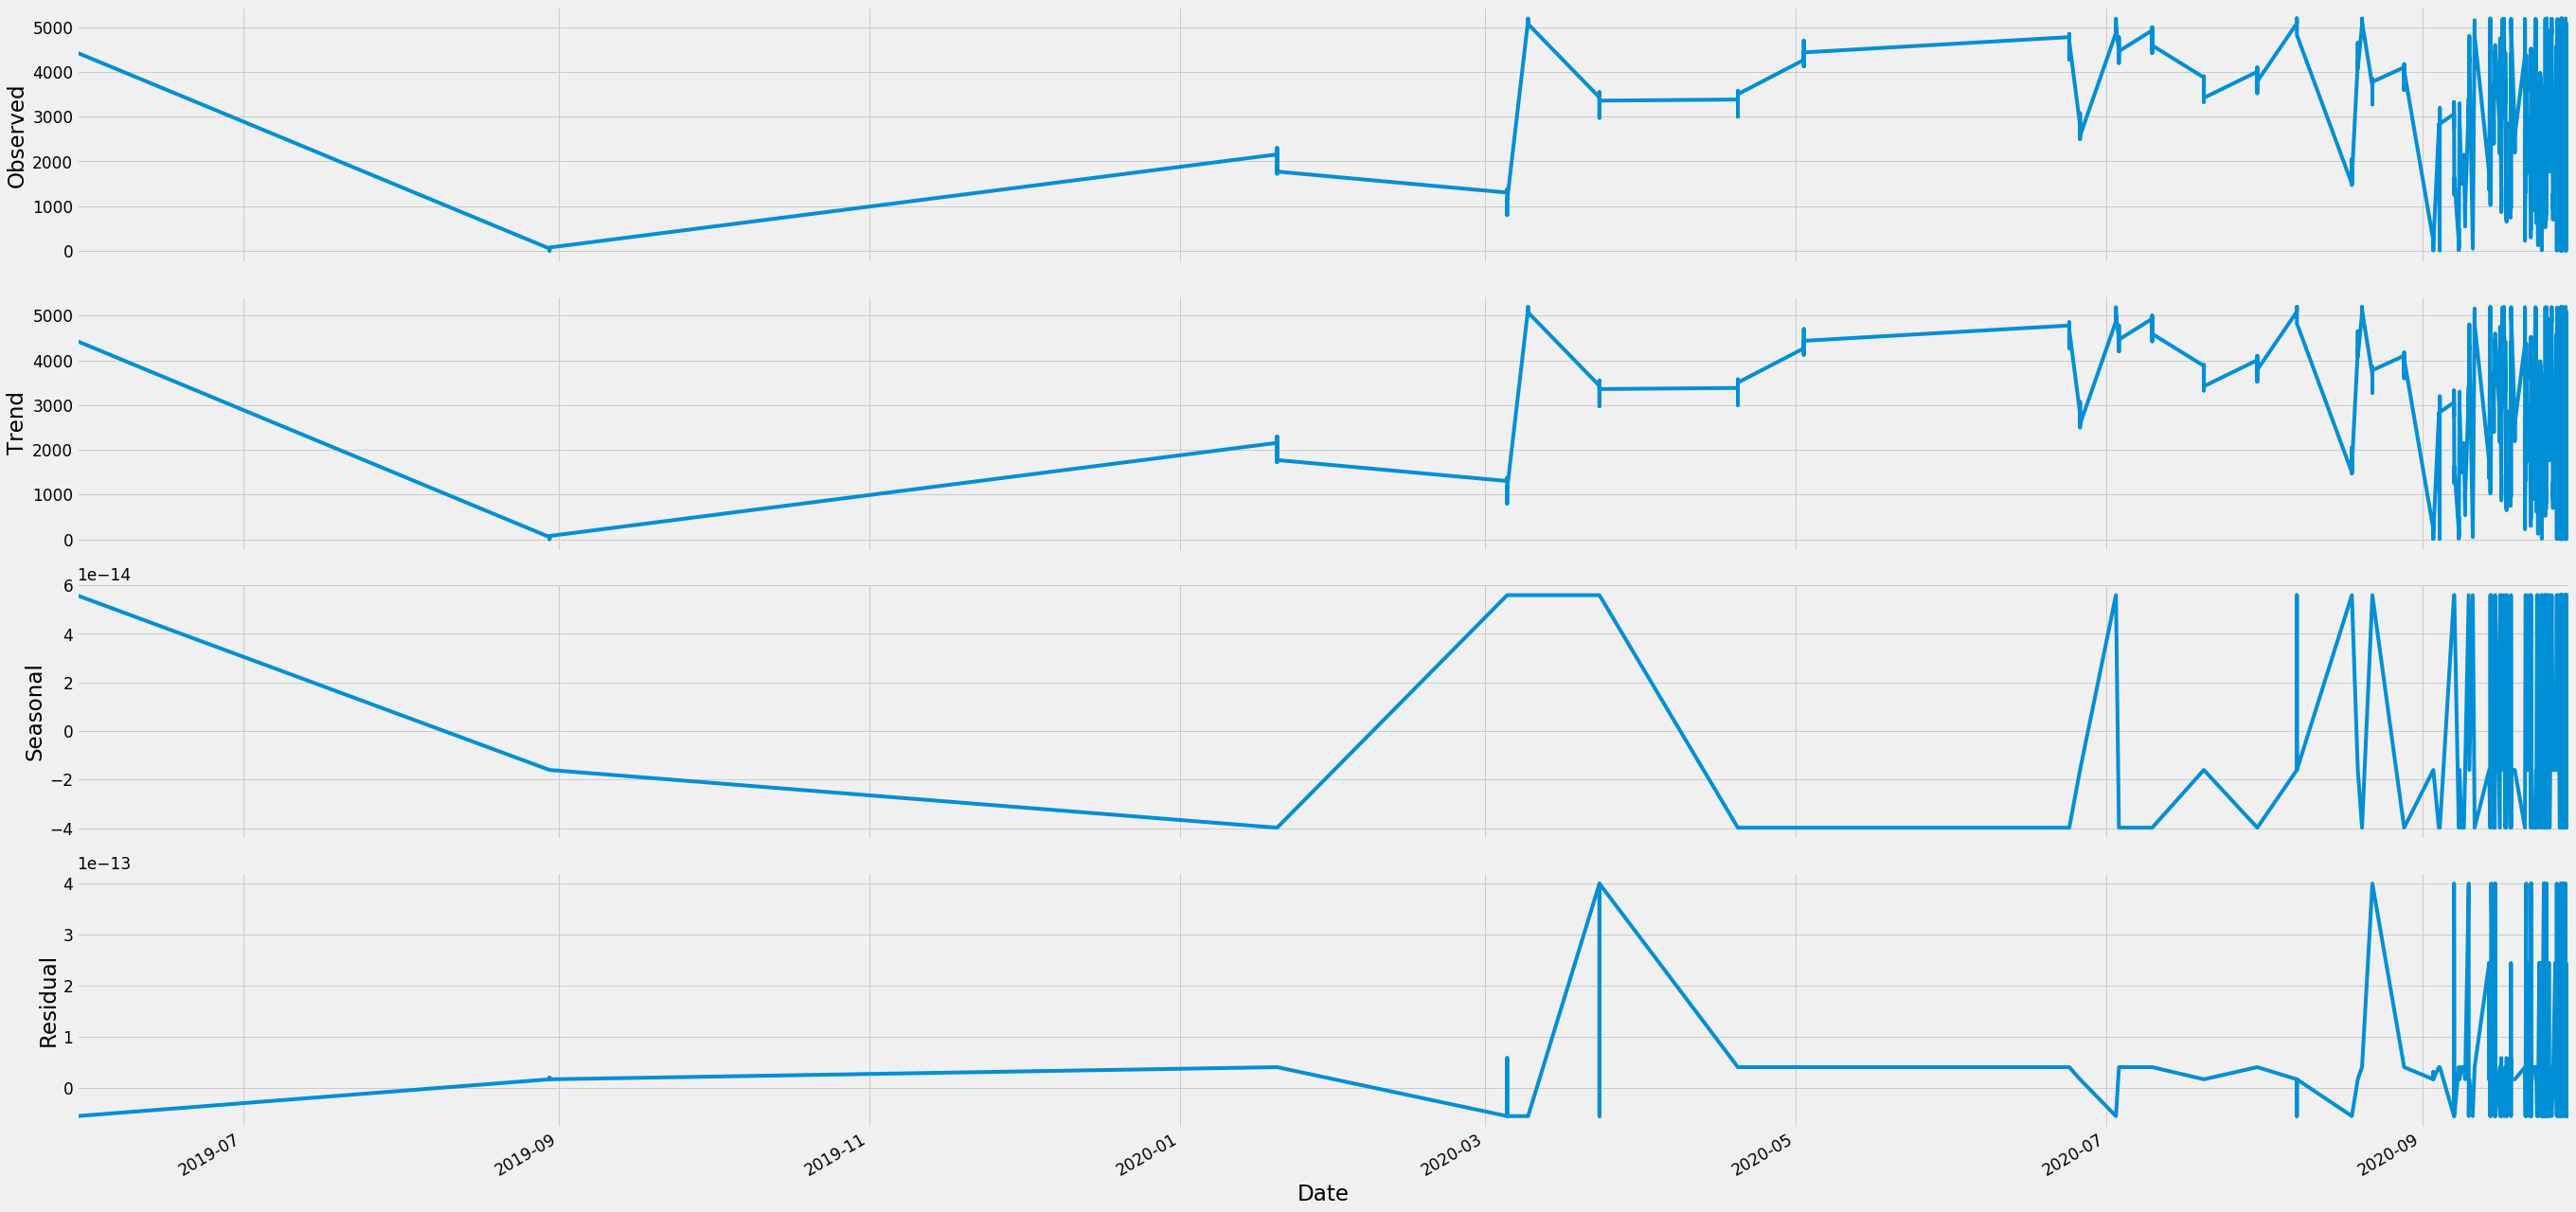

In [20]:
rcParams['figure.figsize'] = 38, 18
decomposition = sm.tsa.seasonal_decompose(df_job, model='additive',freq=3)
fig = decomposition.plot()
plt.show()

In [21]:
df_job

Date
2020-09-28 11:14:33+00:00       0
2020-09-28 03:50:31+00:00       1
2020-09-28 11:14:32+00:00       2
2019-08-30 04:33:55+00:00       3
2020-09-29 05:14:29+00:00       4
                             ... 
2020-09-28 10:41:35+00:00    5195
2020-09-29 03:07:40+00:00    5196
2020-08-07 08:45:13+00:00    5197
2020-09-14 08:26:48+00:00    5198
2020-09-25 10:08:59+00:00    5199
Name: Jobnum, Length: 5200, dtype: int64

In [22]:

p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))

seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [23]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df_job,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
    
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:98013.52952746901
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:206700.93046335966
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:40500.48993040697
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:40512.9391525784
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:33319.70240097372
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:26224.39085720109
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:-109664.95271763705
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:-74774.73618483786
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:131093.62685789893
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:nan
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:204073.1740708037
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:258044.1036392917
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:130961.05045993008
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:130697.83199169906
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:203681.6739279733
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:203604.97389940766
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:14753.284991454108
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:14778.743777019434
ARIMA(0, 1, 0)x

In [24]:
mod = sm.tsa.statespace.SARIMAX(df_job,
                                order=(0, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1      -2.557e-11        nan        nan        nan         nan         nan
ma.S.L12   -2.071e-15        nan        nan        nan         nan         nan
sigma2      1.312e-12        nan        nan        nan         nan         nan


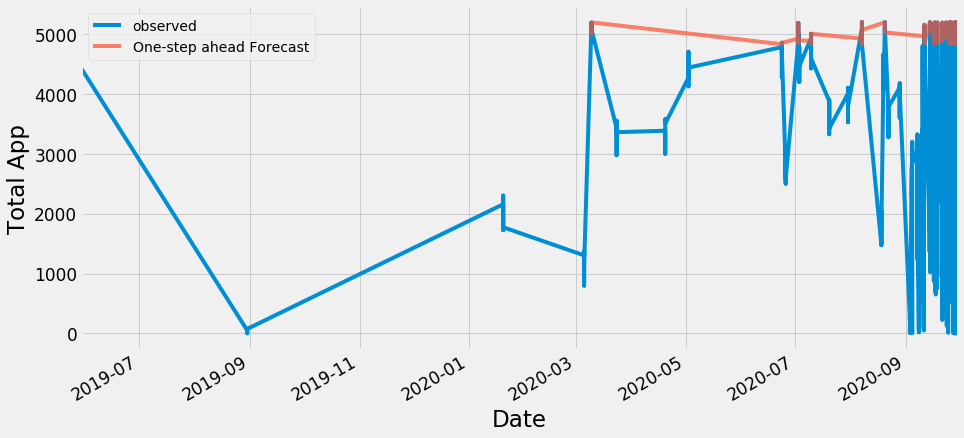

In [31]:
pred = results.get_prediction(start=pd.to_datetime('2020-08-07 08:45:13+00:00'),dynamic=False)
pred_ci = pred.conf_int()

ax = df_job.plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Total App')

plt.legend()
plt.show()

In [38]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()

ax = table['2020':].plot(label='observed', figsize=(20, 10))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)

ax.set_xlabel('Date')
ax.set_ylabel('Total job')
plt.legend()
plt.show()

NameError: name 'table' is not defined

In [70]:
df1.index

DatetimeIndex(['2020-09-28 11:14:33+00:00', '2020-09-28 03:50:31+00:00',
               '2020-09-28 11:14:32+00:00', '2019-08-30 04:33:55+00:00',
               '2020-09-29 05:14:29+00:00', '2020-09-04 09:50:58+00:00',
               '2020-09-27 09:50:33+00:00', '2020-09-29 03:50:55+00:00',
               '2020-09-28 05:14:38+00:00', '2020-09-29 03:51:23+00:00',
               ...
               '2020-09-18 10:29:28+00:00', '2020-03-09 08:49:38+00:00',
               '2020-08-20 03:47:47+00:00', '2020-09-28 05:50:32+00:00',
               '2020-09-28 08:51:53+00:00', '2020-09-28 10:41:35+00:00',
               '2020-09-29 03:07:40+00:00', '2020-08-07 08:45:13+00:00',
               '2020-09-14 08:26:48+00:00', '2020-09-25 10:08:59+00:00'],
              dtype='datetime64[ns, UTC]', name='Date', length=5200, freq=None)